### **Análisis de Datos de Encuesta** ⏰

#### **Diccionario de la encuesta** ⏰

* Q1. ¿Teniendo en cuenta la actitud de la
semana de parciales como nos encontramos hoy?
* Q2. En una escala de 1 a 5, ¿qué tan importante es desayunar antes de llegar a clase?
* Q3. ¿En esta semana de parciales, cual puede ser la nota definitiva de telemática?
* Q4. ¿En la escala de 1 a 5, te gustaría hacer vacacional de telemática?
* Q5. En caso de no haber estudiado Ing. Sistemas, ¿qué otra carrera te gustaría estudiar?
* Q6. Digite por favor la edad

#### **Paso 1. Importar librerías** ⏰ ✌

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### **Paso 2. Importar Data** ⏰ ✌

In [2]:
datos_encuesta = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDVwjuBiYghb-_f4f43asiNjjv0gdIVm7GuNoFUyN4HrkVDsH6XGiD7hT-4NJ1q4HV6CGEg8irNMs_/pub?output=csv')
datos_encuesta.head()

,Marca temporal,Q1,Dirección de correo electrónico,Q2,Q3,Q4,Q5,Q6
0,9/10/2025 6:26:59,Mal,jfbuitrago-2022b@corhuila.edu.co,1,3.0,1,Culinaria,69.5
1,9/10/2025 6:27:06,Mal,jlvargas-2022b@corhuila.edu.co,5,2.3,1,N,18.9
2,9/10/2025 6:27:27,Neutral,sjara-2032b@corhuila.edu.co,5,3.5,1,Mecatrónica,22.0
3,9/10/2025 6:27:28,Bien,svargas-2022a@corhuila.edu.co,5,2.7,5,ninguna otra.,20.0
4,9/10/2025 6:27:35,Regular,afardila-2022b@corhuila.edu.co,5,"2,9",3,Veterinaria,24.0


In [3]:
datos_encuestados = datos_encuesta.copy()

datos_encuestados.drop(['Dirección de correo electrónico','Marca temporal'], axis=1, inplace=True)
datos_encuestados.head()

,Q1,Q2,Q3,Q4,Q5,Q6
0,Mal,1,3.0,1,Culinaria,69.5
1,Mal,5,2.3,1,N,18.9
2,Neutral,5,3.5,1,Mecatrónica,22.0
3,Bien,5,2.7,5,ninguna otra.,20.0
4,Regular,5,"2,9",3,Veterinaria,24.0


In [4]:
datos_encuestados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      62 non-null     object 
 1   Q2      62 non-null     int64  
 2   Q3      61 non-null     object 
 3   Q4      62 non-null     int64  
 4   Q5      60 non-null     object 
 5   Q6      62 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ KB


In [5]:
datos_encuestados.describe().T

,count,mean,std,min,25%,50%,75%,max
Q2,62.0,3.500000,1.411313,1.0,2.25,4.0,5.0,5.0
Q4,62.0,2.548387,1.467432,1.0,1.00,2.0,4.0,5.0
Q6,62.0,30.361290,31.750401,16.0,20.00,22.0,25.0,250.0


Con base en la estadísticas evidenciadas, el promedio de personas (62 entradas) son conscientes de que no les gustaría realizar vacacional de telemática con un valor de 2.5 siendo 1 no me gustaría y 5 me gustaría. De igual manera, el promedio de las edades es de 30 años y consideran que es medianamente importante desayunar antes de venir a clase. Esto podría reflejar diferencias en hábitos alimenticios, horarios o incluso nivel de conciencia sobre el impacto del desayuno en el rendimiento académico.

#### **Paso 3. Revisar Datos NAN** ⏰ ✌

In [6]:
##revisar los datos NAN
datos_encuestados.isna().sum()

Q1    0
Q2    0
Q3    1
Q4    0
Q5    2
Q6    0
dtype: int64

<Axes: >

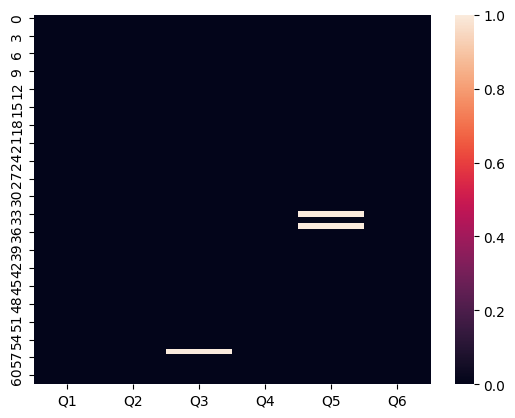

In [7]:
sns.heatmap(datos_encuestados.isna())

#### **Paso 4. Limpiar los datos NAN** ⏰ ✌

In [8]:
datos_encuestados['Q5'].value_counts()

Q5
Veterinaria                                2
diseño grafico                             2
idiomas                                    2
Derecho                                    2
ninguna otra.                              1
Negocios internacionales                   1
Mecatrónica                                1
Culinaria                                  1
Futbolista                                 1
7777888                                    1
ninguna otra                               1
Ingenieria mecatronica                     1
Ing Mecatronica                            1
Negocios internacionales, o embalzador     1
Diseño                                     1
Ingeneria aeroespacial                     1
99                                         1
telecomunicaciones                         1
Ingeniería en petróleo                     1
Ing. Mecatrónica                           1
Bancaria y Financiera                      1
Aviacion                                   1
veterin

In [9]:
import re

def limpiar_q5(columna):
    # Diccionario de mapeo: variantes → estándar
    mapeo = {
        'veterinaria': 'Veterinaria',
        'Veterinaria': 'Veterinaria',
        'diseño grafico': 'Diseño Gráfico',
        'Diseño Grafico': 'Diseño Gráfico',
        'Diseño Gráfico': 'Diseño Gráfico',
        'diseño': 'Diseño Gráfico',
        'Diseño': 'Diseño Gráfico',
        'derecho': 'Derecho',
        'Derecho': 'Derecho',
        'idiomas': 'Idiomas',
        'Ingenieria mecatronica': 'Ingeniería Mecatrónica',
        'Ing Mecatronica': 'Ingeniería Mecatrónica',
        'Ing. Mecatrónica': 'Ingeniería Mecatrónica',
        'mecatrónica': 'Ingeniería Mecatrónica',
        'Mecatrónica': 'Ingeniería Mecatrónica',
        'ninguna otra.': 'Ninguna otra',
        'ninguna otra': 'Ninguna otra',
        'Ninguna': 'Ninguna otra',
        'N': 'Ninguna otra',
        'no se': 'Sin preferencia',
        'Nose': 'Sin preferencia',
        'Sin Plata': 'Sin preferencia',
        'Borracho': 'Sin preferencia',
        'Brujo': 'Sin preferencia',
        '99': 'Valor inválido',
        '7777888': 'Valor inválido',
        '3.0': 'Valor inválido',
        'Ingeneria aeroespacial': 'Ingeniería Aeroespacial',
        'Ing. Ambiental': 'Ingeniería Ambiental',
        'Ingeniería en petróleo': 'Ingeniería en Petróleo',
        'Ingeniería informática': 'Ingeniería Informática',
        'Ingeniería en software': 'Ingeniería en Software',
        'Ingeniería mecánica': 'Ingeniería Mecánica',
        'ing.civil': 'Ingeniería Civil',
        'Ciencias en Datos': 'Ciencia de Datos',
        'Contaduria': 'Contaduría',
        'Marketing digital': 'Marketing Digital',
        'Hoteleria y Turismo': 'Hotelería y Turismo',
        'Negocios internacionales': 'Negocios Internacionales',
        'Negocios internacionales, o embalzador': 'Negocios Internacionales',
        'Docencia': 'Educación',
        'chef': 'Culinaria',
        'Conductor': 'Transporte',
        'Cantante': 'Artes Escénicas',
        'Actor': 'Artes Escénicas',
        'Youtuber': 'Artes Escénicas',
        'Policia': 'Seguridad',
        'Comerciante': 'Comercio',
        # Puedes seguir agregando más variantes aquí...
    }

    def normalizar(valor):
        if pd.isna(valor):
            return 'Sin respuesta'
        valor = valor.strip().lower()
        for clave, estandar in mapeo.items():
            if valor == clave.lower():
                return estandar
        # Si no se encuentra en el mapeo, devolver capitalizado
        return valor.title()

    return columna.apply(normalizar)


datos_encuestados['Q5'] = limpiar_q5(datos_encuestados['Q5'])

In [10]:
datos_encuestados['Q5'].value_counts()

Q5
Diseño Gráfico                 6
Sin preferencia                5
Ingeniería Mecatrónica         5
Derecho                        4
Ninguna otra                   4
Valor inválido                 3
Veterinaria                    3
Artes Escénicas                3
Culinaria                      2
Idiomas                        2
Sin respuesta                  2
Negocios Internacionales       2
Ingeniería Aeroespacial        1
Aviacion                       1
Futbolista                     1
Telecomunicaciones             1
Ingeniería en Petróleo         1
Marketing Digital              1
Instrumentación  Quirúrgico    1
Bancaria Y Financiera          1
Transporte                     1
Ingeniería Civil               1
Educación                      1
Ingeniería Informática         1
Enfermeria                     1
Seguridad                      1
Ingeniería Ambiental           1
Hotelería y Turismo            1
Ingeniería en Software         1
Ciencia de Datos               1
Ingenie

In [11]:
datos_encuestados['Q3'].value_counts()

Q3
3.5                     6
5.0                     6
3.0                     5
4                       3
4.0                     3
5                       3
2                       2
2.3                     2
6.0                     2
2.5                     2
1.5                     2
2.7                     1
cinquito                1
0.1                     1
jmmm un 3.0             1
2.0                     1
2.6                     1
1.9                     1
Siendo optimista 2.0    1
2,9                     1
0.0                     1
2,5                     1
4.5                     1
un 50                   1
1                       1
6                       1
bien                    1
3.2                     1
0                       1
3,5                     1
3.4                     1
3                       1
2.8                     1
3.3                     1
Alta                    1
3,7                     1
Name: count, dtype: int64

In [12]:
def limpiar_q3(columna):
    def extraer_valor(valor):
        if pd.isna(valor):
            return np.nan
        # Reemplazar coma decimal por punto
        valor = str(valor).replace(',', '.').strip().lower()

        # Buscar número decimal o entero en el texto
        match = re.search(r'(\d+(\.\d+)?)', valor)
        if match:
            num = float(match.group(1))
            # Filtrar por rango válido
            if 0.0 <= num <= 5.0:
                return num
        return np.nan  # Si no es válido o está fuera de rango

    # Aplicar limpieza
    columna_limpia = columna.apply(extraer_valor)
    return columna_limpia.astype('float64')


datos_encuestados['Q3'] = limpiar_q3(datos_encuestados['Q3'])



In [13]:
datos_encuestados['Q3'].describe().T

count    54.000000
mean      3.142593
std       1.287326
min       0.000000
25%       2.500000
50%       3.100000
75%       4.000000
max       5.000000
Name: Q3, dtype: float64

In [14]:
datos_encuestados.isna().sum()

Q1    0
Q2    0
Q3    8
Q4    0
Q5    0
Q6    0
dtype: int64

<Axes: ylabel='Density'>

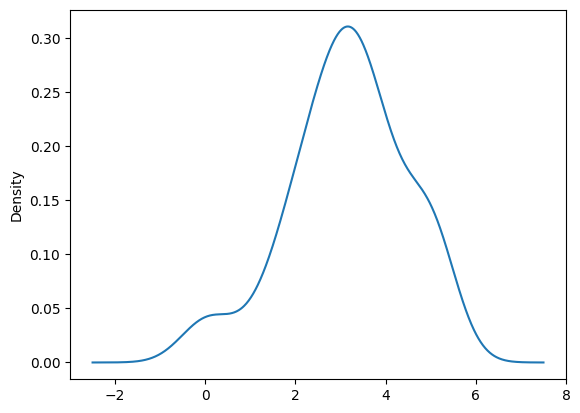

In [15]:
datos_encuestados['Q3'].plot(kind='kde')

In [16]:
datos_encuestados['Q3'].fillna(datos_encuestados['Q3'].median(), inplace=True)

datos_encuestados.isna().sum()

##Knn Imputer (Vecinos 5 datos (5 mas vecinos - Codo))


Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
Q6    0
dtype: int64

In [17]:
datos_encuestados.to_csv('datos_limpios.csv', index=False)

datos_encuestados.to_excel('datos_limpios.xlsx', index=False)

#### **Paso 5. Realizar gráficas para analizar tendencias** ⏰ ✌

In [18]:
datos_encuestados.head()

,Q1,Q2,Q3,Q4,Q5,Q6
0,Mal,1,3.0,1,Culinaria,69.5
1,Mal,5,2.3,1,Ninguna otra,18.9
2,Neutral,5,3.5,1,Ingeniería Mecatrónica,22.0
3,Bien,5,2.7,5,Ninguna otra,20.0
4,Regular,5,2.9,3,Veterinaria,24.0


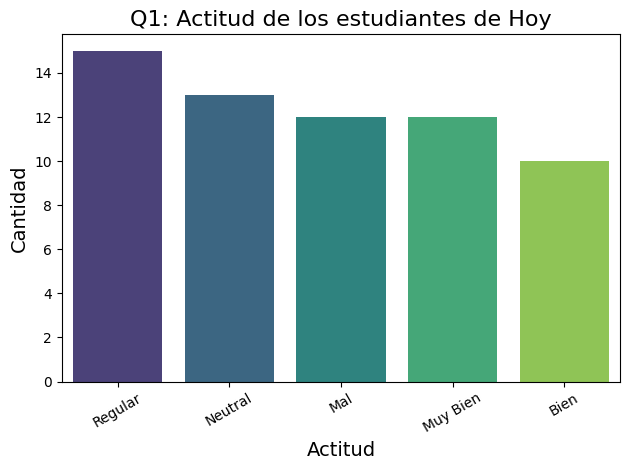

In [19]:
plt.figure()
sns.countplot(x='Q1', data=datos_encuestados, palette='viridis', order= datos_encuestados['Q1'].value_counts().index)
plt.title('Q1: Actitud de los estudiantes de Hoy', fontsize=16)
plt.xlabel('Actitud', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('Q1.png', dpi=400)
plt.show()


##### **Análisis Gráfica 1** ⏰ ✌

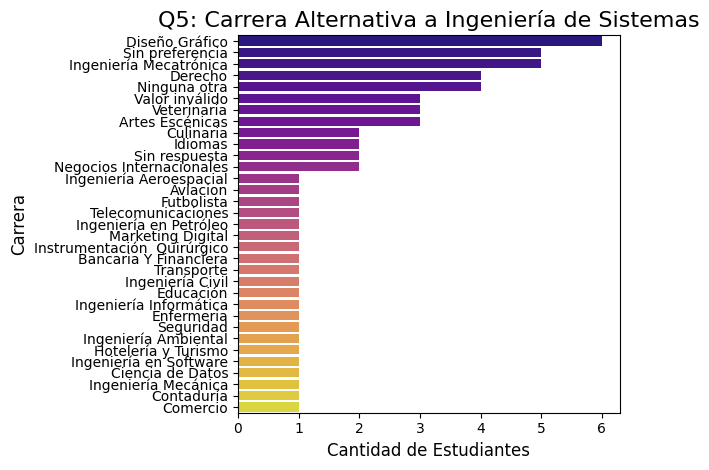

In [20]:
plt.figure()
sns.countplot(y='Q5', data=datos_encuestados, palette='plasma', order=datos_encuestados['Q5'].value_counts().index)
plt.title('Q5: Carrera Alternativa a Ingeniería de Sistemas', fontsize=16)
plt.xlabel('Cantidad de Estudiantes', fontsize=12)
plt.ylabel('Carrera', fontsize=12)
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

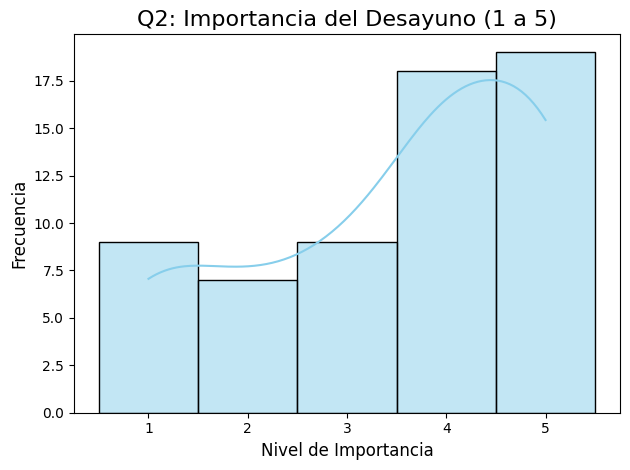

In [21]:
plt.figure()
sns.histplot(datos_encuestados['Q2'], bins=15, kde=True, color='skyblue', discrete=True)
plt.title('Q2: Importancia del Desayuno (1 a 5)', fontsize=16)
plt.xlabel('Nivel de Importancia', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

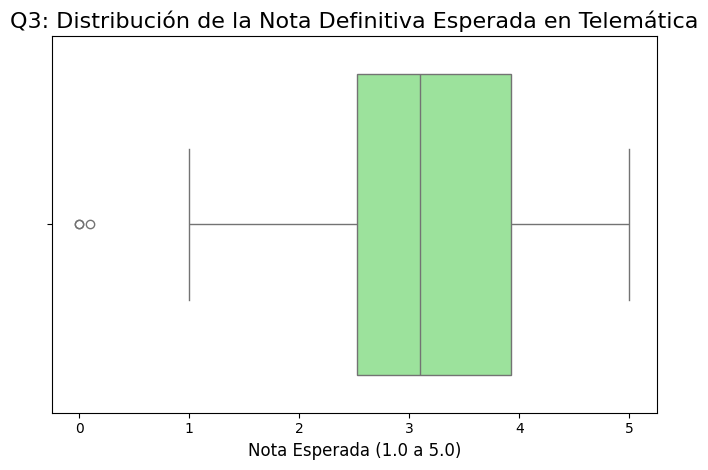

In [22]:
plt.figure()
sns.boxplot(x=datos_encuestados['Q3'], color='lightgreen')
plt.title('Q3: Distribución de la Nota Definitiva Esperada en Telemática', fontsize=16)
plt.xlabel('Nota Esperada (1.0 a 5.0)', fontsize=12)
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

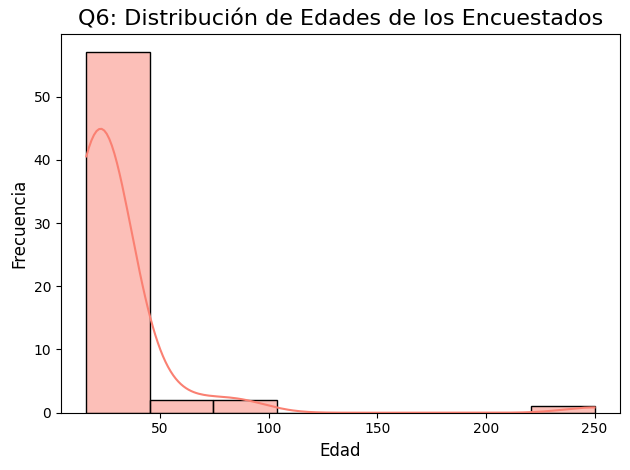

In [23]:
plt.figure()
sns.histplot(datos_encuestados['Q6'], kde=True, color='salmon', bins=8)
plt.title('Q6: Distribución de Edades de los Encuestados', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

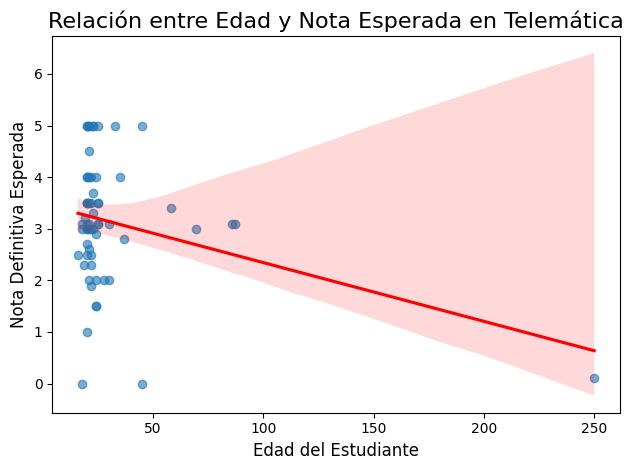

In [24]:
plt.figure()
sns.regplot(x='Q6', y='Q3', data=datos_encuestados, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Relación entre Edad y Nota Esperada en Telemática', fontsize=16)
plt.xlabel('Edad del Estudiante', fontsize=12)
plt.ylabel('Nota Definitiva Esperada', fontsize=12)
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

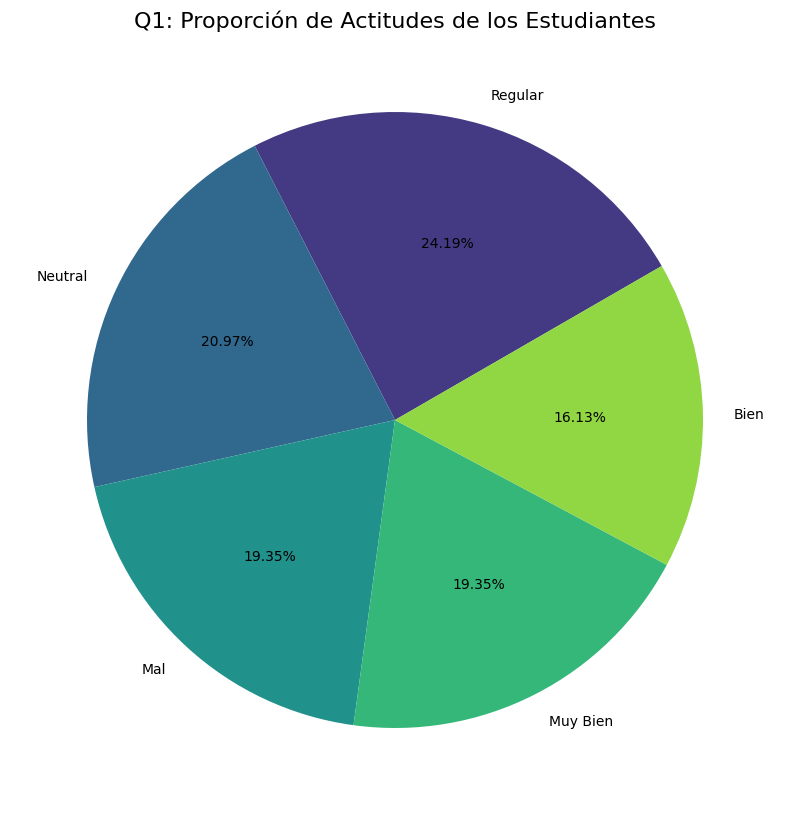

In [25]:
plt.figure(figsize=(10, 10))
q1_counts = datos_encuestados['Q1'].value_counts()
plt.pie(q1_counts, labels=q1_counts.index, autopct='%1.2f%%', startangle=30, colors=sns.color_palette('viridis', len(q1_counts)))
plt.title('Q1: Proporción de Actitudes de los Estudiantes', fontsize=16)
plt.ylabel('') # Ocultar el label del eje y que aparece por defecto
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

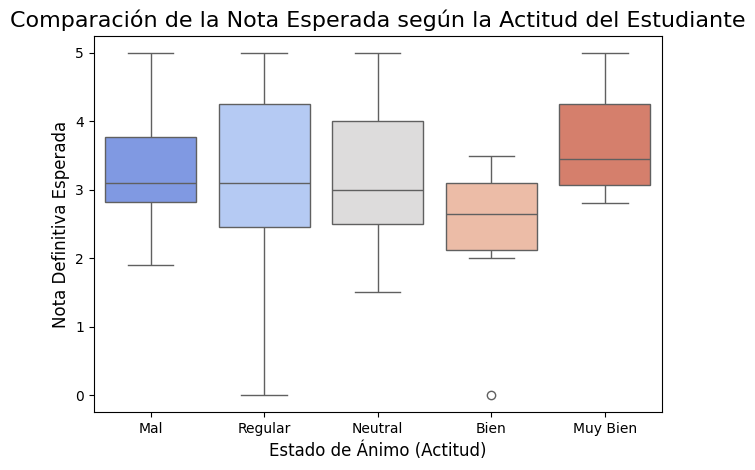

In [26]:
plt.figure()
# Ordenar las categorías para una mejor visualización
order = ['Mal', 'Regular', 'Neutral', 'Bien', 'Muy Bien']
sns.boxplot(x='Q1', y='Q3', data=datos_encuestados, palette='coolwarm', order=order)
plt.title('Comparación de la Nota Esperada según la Actitud del Estudiante', fontsize=16)
plt.xlabel('Estado de Ánimo (Actitud)', fontsize=12)
plt.ylabel('Nota Definitiva Esperada', fontsize=12)
plt.tight_layout()
plt.show()

##### **Análisis Gráfica 1** ⏰ ✌

#### **Paso 6. Conversión de variables de texto a número** ⏰ ✌

In [27]:
datos_encuestados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      62 non-null     object 
 1   Q2      62 non-null     int64  
 2   Q3      62 non-null     float64
 3   Q4      62 non-null     int64  
 4   Q5      62 non-null     object 
 5   Q6      62 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.0+ KB


In [28]:
datos_encuestados['Q1'].value_counts()

Q1
Regular     15
Neutral     13
Mal         12
Muy Bien    12
Bien        10
Name: count, dtype: int64

In [29]:
datos_encuestados['Q5'].value_counts()

Q5
Diseño Gráfico                 6
Sin preferencia                5
Ingeniería Mecatrónica         5
Derecho                        4
Ninguna otra                   4
Valor inválido                 3
Veterinaria                    3
Artes Escénicas                3
Culinaria                      2
Idiomas                        2
Sin respuesta                  2
Negocios Internacionales       2
Ingeniería Aeroespacial        1
Aviacion                       1
Futbolista                     1
Telecomunicaciones             1
Ingeniería en Petróleo         1
Marketing Digital              1
Instrumentación  Quirúrgico    1
Bancaria Y Financiera          1
Transporte                     1
Ingeniería Civil               1
Educación                      1
Ingeniería Informática         1
Enfermeria                     1
Seguridad                      1
Ingeniería Ambiental           1
Hotelería y Turismo            1
Ingeniería en Software         1
Ciencia de Datos               1
Ingenie

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

datos_encuestados['Q1'] = le.fit_transform(datos_encuestados['Q1'])
datos_encuestados['Q5'] = le.fit_transform(datos_encuestados['Q5'])

In [31]:
datos_encuestados.head()

,Q1,Q2,Q3,Q4,Q5,Q6
0,1,1,3.0,1,6,69.5
1,1,5,2.3,1,25,18.9
2,3,5,3.5,1,18,22.0
3,0,5,2.7,5,25,20.0
4,4,5,2.9,3,32,24.0


## Agregar data extra el dataframe

In [32]:
##Determinar cuantos registros vamos a crear
num_filas = len(datos_encuestados)
##num_filas

horas_sueno = np.random.uniform(4,9, num_filas).round(1)
nivel_estres = np.random.randint(1,11, num_filas)

datos_encuestados['Q7']= horas_sueno
datos_encuestados['Q8']= nivel_estres

datos_encuestados.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,1,1,3.0,1,6,69.5,5.6,8
1,1,5,2.3,1,25,18.9,6.6,4
2,3,5,3.5,1,18,22.0,8.4,8
3,0,5,2.7,5,25,20.0,6.3,3
4,4,5,2.9,3,32,24.0,6.2,1


#### **Paso 7. Normalización** ⏰ ✌

In [33]:
datos_encuestados.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,62.0,2.177419,1.420277,0.0,1.000,2.0,3.000,4.0
Q2,62.0,3.500000,1.411313,1.0,2.250,4.0,5.000,5.0
Q3,62.0,3.137097,1.200032,0.0,2.525,3.1,3.925,5.0
Q4,62.0,2.548387,1.467432,1.0,1.000,2.0,4.000,5.0
Q5,62.0,16.790323,9.959158,0.0,8.000,18.0,25.750,32.0
Q6,62.0,30.361290,31.750401,16.0,20.000,22.0,25.000,250.0
Q7,62.0,6.532258,1.556980,4.0,5.225,6.3,7.975,9.0
Q8,62.0,4.725806,2.662240,1.0,3.000,4.5,6.750,10.0


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

datos_encuestados[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']] = scaler.fit_transform(datos_encuestados[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']])

datos_encuestados.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,62.0,0.544355,0.355069,0.0,0.250000,0.500000,0.750000,1.0
Q2,62.0,0.625000,0.352828,0.0,0.312500,0.750000,1.000000,1.0
Q3,62.0,0.627419,0.240006,0.0,0.505000,0.620000,0.785000,1.0
Q4,62.0,0.387097,0.366858,0.0,0.000000,0.250000,0.750000,1.0
Q5,62.0,0.524698,0.311224,0.0,0.250000,0.562500,0.804688,1.0
Q6,62.0,0.061373,0.135685,0.0,0.017094,0.025641,0.038462,1.0
Q7,62.0,0.506452,0.311396,0.0,0.245000,0.460000,0.795000,1.0
Q8,62.0,0.413978,0.295804,0.0,0.222222,0.388889,0.638889,1.0


#### **Paso 8. Correlación** ⏰ ✌

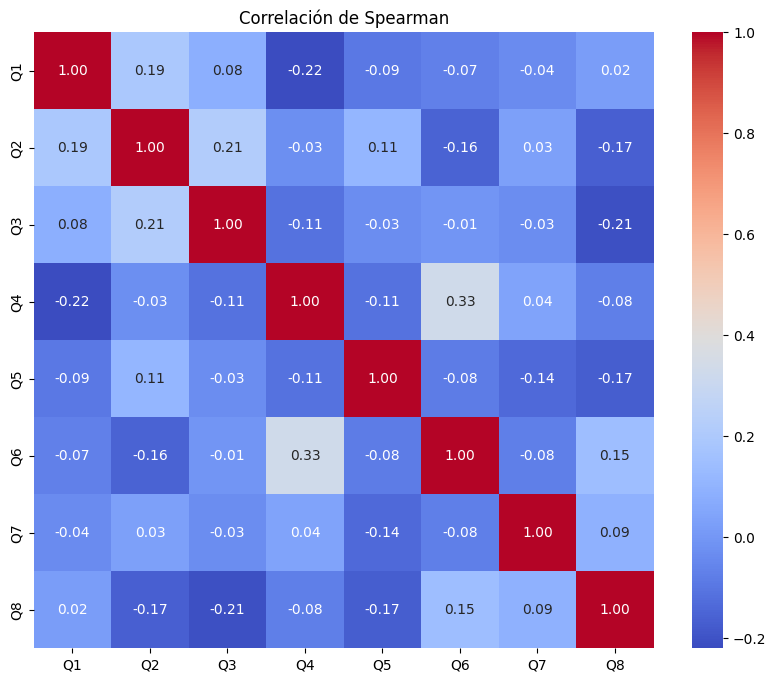

In [35]:
spearman_corr = datos_encuestados.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Spearman')
plt.show()

#### **Paso 9. Test de Normalidad** ⏰ ✌

In [36]:
##test de normalidad
from scipy.stats import shapiro

def analizar_normalidad_dataframe(dataframe, alpha=0.05):
    """
    Aplica el test de Shapiro-Wilk a todas las columnas numéricas de un DataFrame.

    Args:
        dataframe (pd.DataFrame): El DataFrame a analizar.
        alpha (float): El nivel de significancia para la prueba. Por defecto es 0.05.
    """
    print("--- Análisis de Normalidad con Test de Shapiro-Wilk ---")
    print(f"Nivel de significancia (alpha) = {alpha}")
    print("-" * 55)

    for column in dataframe.columns:
        # Verificar si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(dataframe[column]):

            # Eliminar valores nulos para el test, ya que no los admite
            data_to_test = dataframe[column].dropna()

            # El test de Shapiro-Wilk requiere al menos 3 muestras
            if len(data_to_test) < 3:
                print(f"\nColumna: '{column}'")
                print("  -> No tiene suficientes datos (menos de 3) para realizar el test.")
                continue

            # Ignorar advertencias de Scipy si los datos son casi constantes
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                stat, p_value = shapiro(data_to_test)

            print(f"\nColumna: '{column}'")
            print(f"  Estadístico W = {stat:.4f}")
            print(f"  P-valor = {p_value:.4f}")

            # Interpretación del resultado
            if p_value > alpha:
                print(f"  Conclusión: P-valor > {alpha}. Los datos PARECEN seguir una distribución normal.")
            else:
                print(f"  Conclusión: P-valor <= {alpha}. Los datos NO parecen seguir una distribución normal.")

        else:
            # Si la columna no es numérica, se omite
            print(f"\nColumna: '{column}'")
            print("  -> Es no numérica. Omitiendo test de normalidad.")

    print("-" * 55)


# --- 3. Ejecutar la Función ---
analizar_normalidad_dataframe(datos_encuestados)

--- Análisis de Normalidad con Test de Shapiro-Wilk ---
Nivel de significancia (alpha) = 0.05
-------------------------------------------------------

Columna: 'Q1'
  Estadístico W = 0.8848
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'Q2'
  Estadístico W = 0.8485
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'Q3'
  Estadístico W = 0.9346
  P-valor = 0.0026
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'Q4'
  Estadístico W = 0.8472
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'Q5'
  Estadístico W = 0.9345
  P-valor = 0.0026
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'Q6'
  Estadístico W = 0.3517
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución 

#### **Paso 10. Pregunta de Investigación** ⏰ ✌

¿Es posible predecir la edad de los estudiantes con base en todas las preguntas de la encuesta? y con que eficiencia se genera esta solución.

#### **Paso 11: Ejercicio de Regresión - Predicción** ⏰ ✌

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = datos_encuestados.drop('Q6', axis=1)
y = datos_encuestados['Q6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_predicciones = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_predicciones)
r2 = r2_score(y_test, y_predicciones)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 0.01936425077282972
Coeficiente de Determinación (R^2): -0.5432295263997187


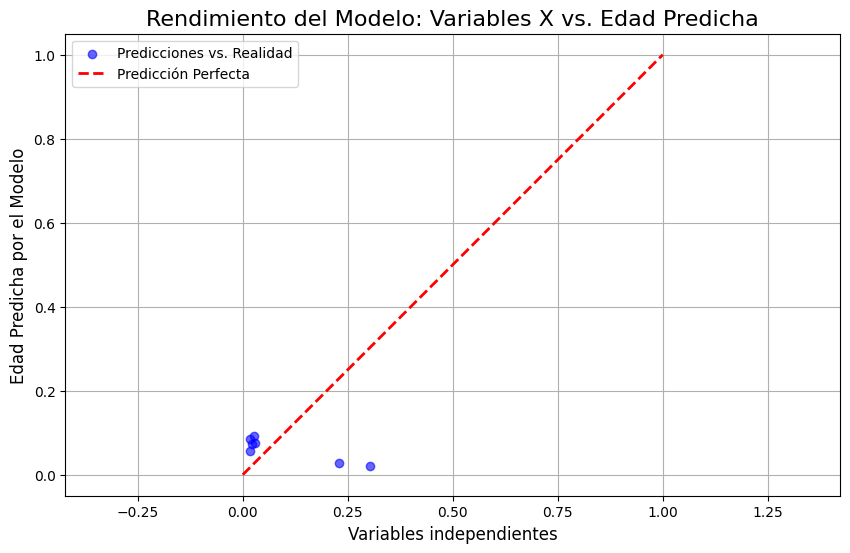

In [ ]:
plt.figure(figsize=(10, 6))
# Graficar los puntos: en el eje X los valores reales, en el eje Y los predichos
plt.scatter(y_test, y_predicciones, color='blue', alpha=0.6, label='Predicciones vs. Realidad')
# Graficar la línea de 45 grados (representa la predicción perfecta)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Predicción Perfecta')

plt.title('Rendimiento del Modelo: Variables X vs. Edad Predicha', fontsize=16)
plt.xlabel('Variables independientes', fontsize=12)
plt.ylabel('Edad Predicha por el Modelo', fontsize=12)
plt.legend()
plt.grid(True)
# Asegurar que los ejes tengan la misma escala para una correcta visualización de la línea de 45°
plt.axis('equal')
plt.show()